In [1]:
#we will now work with seaborn 
#import necessary libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

sns.set_style('whitegrid')
df = pd.read_csv('./global_sales_data/market_fact.csv')

c:\users\ruchi\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


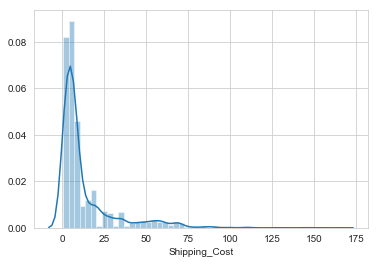

In [2]:
#distplot -> plots distribution on y axis and values on x axis
sns.distplot(df['Shipping_Cost'])
plt.show();
#show probab distribution and general trend

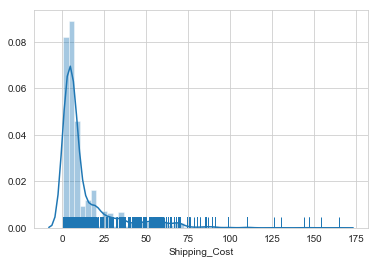

In [3]:
#rug plot actually marks each data point so we can get an idea of how and where data is dense
sns.distplot(df['Shipping_Cost'],rug=True)
plt.show();

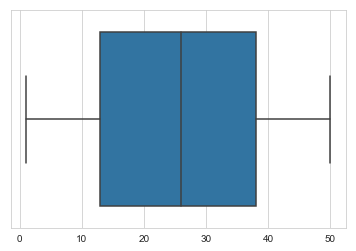

In [4]:
#boxplot
sns.boxplot([df['Order_Quantity']])
plt.show();

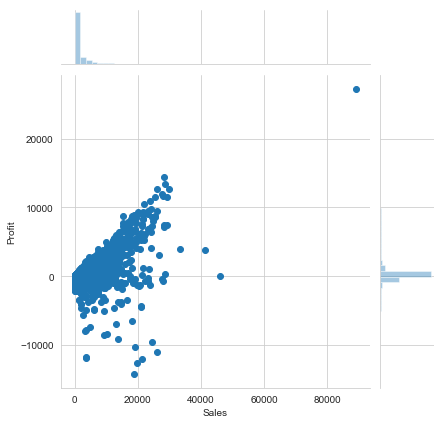

In [5]:
#bi-variate analysis-> two univariate distributions plotted on x and y so we can see their relation
sns.jointplot('Sales','Profit',df)
plt.show();

## Pairwise Relationship

In [6]:
#when we have large dimensional data we cant rely on visualizing everything one by one we use something like pariplot

In [7]:
#Load in the data
btc = pd.read_csv('crypto_data/bitcoin_price.csv')
ether = pd.read_csv('crypto_data/ethereum_price.csv')
ltc = pd.read_csv('crypto_data/litecoin_price.csv')
monero = pd.read_csv('crypto_data/monero_price.csv')
neo = pd.read_csv('crypto_data/neo_price.csv')
quantum = pd.read_csv('crypto_data/qtum_price.csv')
ripple = pd.read_csv('crypto_data/ripple_price.csv')

#add suffix before each col name so join plots are easily intrepretable
btc.columns = btc.columns.map(lambda x: str(x) + '_btc')
ether.columns = ether.columns.map(lambda x: str(x) + '_et')
ltc.columns = ltc.columns.map(lambda x: str(x) + '_ltc')
monero.columns = monero.columns.map(lambda x: str(x) + '_mon')
neo.columns = neo.columns.map(lambda x: str(x) + '_neo')
quantum.columns = quantum.columns.map(lambda x: str(x) + '_qt')
ripple.columns = ripple.columns.map(lambda x: str(x) + '_rip')

btc.head()

,Date_btc,Open_btc,High_btc,Low_btc,Close_btc,Volume_btc,Market Cap_btc
0,"Nov 07, 2017",7023.10,7253.32,7023.10,7144.38,"2,326,340,000","117,056,000,000"
1,"Nov 06, 2017",7403.22,7445.77,7007.31,7022.76,"3,111,900,000","123,379,000,000"
2,"Nov 05, 2017",7404.52,7617.48,7333.19,7407.41,"2,380,410,000","123,388,000,000"
3,"Nov 04, 2017",7164.48,7492.86,7031.28,7379.95,"2,483,800,000","119,376,000,000"
4,"Nov 03, 2017",7087.53,7461.29,7002.94,7207.76,"3,369,860,000","118,084,000,000"


In [8]:
#merge all datasets to create one big dataset
# merging all the files by date
m1 = pd.merge(btc, ether, how="inner", left_on="Date_btc", right_on="Date_et")
m2 = pd.merge(m1, ltc, how="inner", left_on="Date_btc", right_on="Date_ltc")
m3 = pd.merge(m2, monero, how="inner", left_on="Date_btc", right_on="Date_mon")
m4 = pd.merge(m3, neo, how="inner", left_on="Date_btc", right_on="Date_neo")
m5 = pd.merge(m4, quantum, how="inner", left_on="Date_btc", right_on="Date_qt")
crypto = pd.merge(m5, ripple, how="inner", left_on="Date_btc", right_on="Date_rip")

crypto.head()

,Date_btc,Open_btc,High_btc,Low_btc,Close_btc,Volume_btc,Market Cap_btc,Date_et,Open_et,High_et,...,Close_qt,Volume_qt,Market Cap_qt,Date_rip,Open_rip,High_rip,Low_rip,Close_rip,Volume_rip,Market Cap_rip
0,"Nov 07, 2017",7023.10,7253.32,7023.10,7144.38,"2,326,340,000","117,056,000,000","Nov 07, 2017",298.57,304.84,...,11.21,"122,951,000","760,320,000","Nov 07, 2017",0.205103,0.211375,0.203978,0.210354,"114,073,000","7,902,920,000"
1,"Nov 06, 2017",7403.22,7445.77,7007.31,7022.76,"3,111,900,000","123,379,000,000","Nov 06, 2017",296.43,305.42,...,10.44,"116,937,000","745,802,000","Nov 06, 2017",0.201967,0.208662,0.201410,0.205990,"102,233,000","7,782,080,000"
2,"Nov 05, 2017",7404.52,7617.48,7333.19,7407.41,"2,380,410,000","123,388,000,000","Nov 05, 2017",300.04,301.37,...,10.13,"49,288,500","739,113,000","Nov 05, 2017",0.203274,0.205124,0.201117,0.202055,"46,959,000","7,832,450,000"
3,"Nov 04, 2017",7164.48,7492.86,7031.28,7379.95,"2,483,800,000","119,376,000,000","Nov 04, 2017",305.48,305.48,...,10.05,"35,477,100","759,110,000","Nov 04, 2017",0.208083,0.208479,0.202133,0.203750,"74,013,200","8,017,770,000"
4,"Nov 03, 2017",7087.53,7461.29,7002.94,7207.76,"3,369,860,000","118,084,000,000","Nov 03, 2017",288.50,308.31,...,10.38,"55,018,600","719,701,000","Nov 03, 2017",0.206205,0.228026,0.201728,0.208133,"373,402,000","7,945,410,000"


In [9]:
# Subsetting only the closing prices column for plotting
curr = crypto[["Close_btc", "Close_et", 'Close_ltc', "Close_mon", "Close_neo", "Close_qt"]]
curr.head()

,Close_btc,Close_et,Close_ltc,Close_mon,Close_neo,Close_qt
0,7144.38,294.66,61.30,99.76,26.23,11.21
1,7022.76,298.89,55.17,102.92,26.32,10.44
2,7407.41,296.26,54.75,86.35,26.38,10.13
3,7379.95,300.47,55.04,87.30,26.49,10.05
4,7207.76,305.71,56.18,87.99,26.82,10.38


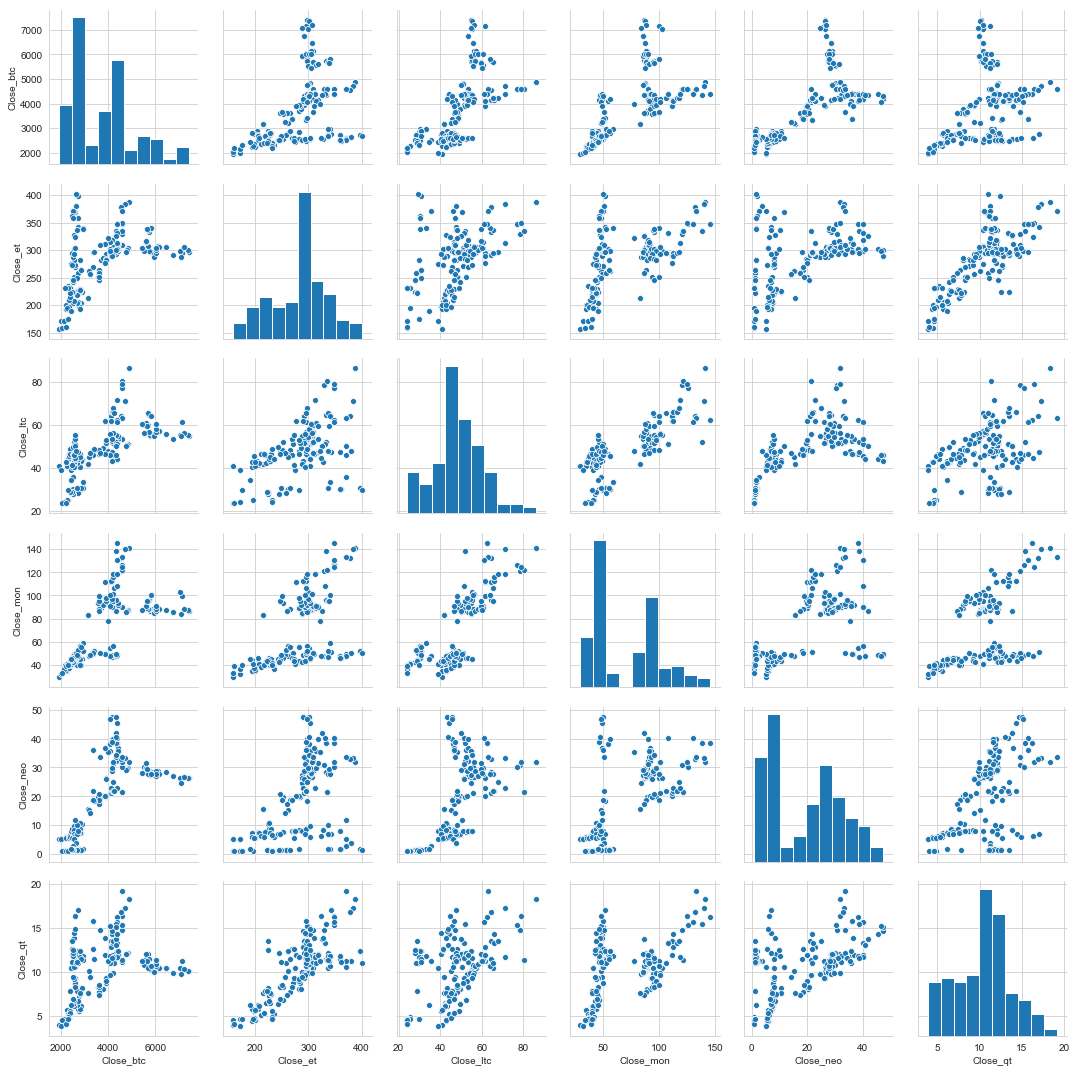

In [10]:
sns.pairplot(curr)
plt.show();

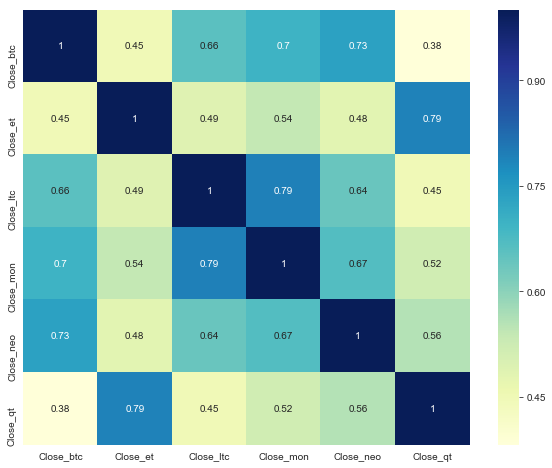

In [11]:
#head maps
corr = curr.corr()
round(corr,3)
plt.figure(figsize=(10,8))

sns.heatmap(corr,cmap='YlGnBu',annot=True)
plt.show()